In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.sparse import csc_array
import scipy.sparse.linalg as spla

import matplotlib.pyplot as plt
import matplotlib as mpl

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

from qs_mps.applications.Z2.exact_hamiltonian import *
from qs_mps.sparse_hamiltonians_and_operators import *
from qs_mps.mps_class import MPS
from qs_mps.utils import anim, get_cx, get_cy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
L = 12
model = "Ising"
chi = 32
couplings = np.arange(0,0.4,step=1e-2)
eps = 1e-7
J = 1

In [ ]:
ising_chain = MPS(L=L, d=2, model=model,chi=chi, J=J, h=couplings[0], eps=eps)

mag_x_tot = []
mag_z_tot = []
fidelity = []
for i, h in enumerate(couplings):
    print(f"coupling: {h:.4f}")
    # if i == 0:
    #     ising_chain._random_state(seed=3, chi=chi)
    # else:
    #     ising_chain.h = h
    #     mps_param_h_prev = ising_chain.sites.copy()
    if i >= 1:
        mps_param_h_prev = ising_chain.sites.copy()

    ising_chain._random_state(seed=3, chi=chi)
    ising_chain.canonical_form()
    ising_chain.h = h
    energies, entropy, schmidt_vals, t_dmrg = ising_chain.DMRG(trunc_chi=True, trunc_tol=False, conv_tol=1e-15, n_sweeps=4, where=L//2)
    # ising_chain.order_param_Ising(op="X")
    # mag_x_tot.append(ising_chain.mpo_first_moment().real/L)
    ising_chain.single_operator_Ising(site=L//2)
    mag_x_tot.append(ising_chain.mpo_first_moment().real)
    # ising_chain.order_param_Ising(op="Z")
    # mag_z_tot.append(ising_chain.mpo_first_moment().real/L)
    ising_chain.single_operator_Ising(site=L//2, op="Z")
    mag_z_tot.append(ising_chain.mpo_first_moment().real)
    if i >= 1:
        ising_chain.ancilla_sites = mps_param_h_prev.copy()
        fidelity.append(ising_chain._compute_norm(site=1, ancilla=True).copy())

coupling: 0.0000
Sweep n: 0

Sweep n: 1

coupling: 0.0100
Sweep n: 0

Sweep n: 1

coupling: 0.0200
Sweep n: 0

Sweep n: 1

coupling: 0.0300
Sweep n: 0

Sweep n: 1

coupling: 0.0400
Sweep n: 0

Sweep n: 1

coupling: 0.0500
Sweep n: 0

Sweep n: 1

coupling: 0.0600
Sweep n: 0

Sweep n: 1

coupling: 0.0700
Sweep n: 0

Sweep n: 1

coupling: 0.0800
Sweep n: 0

Sweep n: 1

coupling: 0.0900
Sweep n: 0

Sweep n: 1

coupling: 0.1000
Sweep n: 0

Sweep n: 1

coupling: 0.1100
Sweep n: 0

Sweep n: 1

coupling: 0.1200
Sweep n: 0

Sweep n: 1

coupling: 0.1300
Sweep n: 0

Sweep n: 1

coupling: 0.1400
Sweep n: 0

Sweep n: 1

coupling: 0.1500
Sweep n: 0

Sweep n: 1

coupling: 0.1600
Sweep n: 0

Sweep n: 1

coupling: 0.1700
Sweep n: 0

Sweep n: 1

coupling: 0.1800
Sweep n: 0

Sweep n: 1

coupling: 0.1900
Sweep n: 0

Sweep n: 1

coupling: 0.2000
Sweep n: 0

Sweep n: 1

coupling: 0.2100
Sweep n: 0

Sweep n: 1

coupling: 0.2200
Sweep n: 0

Sweep n: 1

coupling: 0.2300
Sweep n: 0

Sweep n: 1

coupling: 0.2400

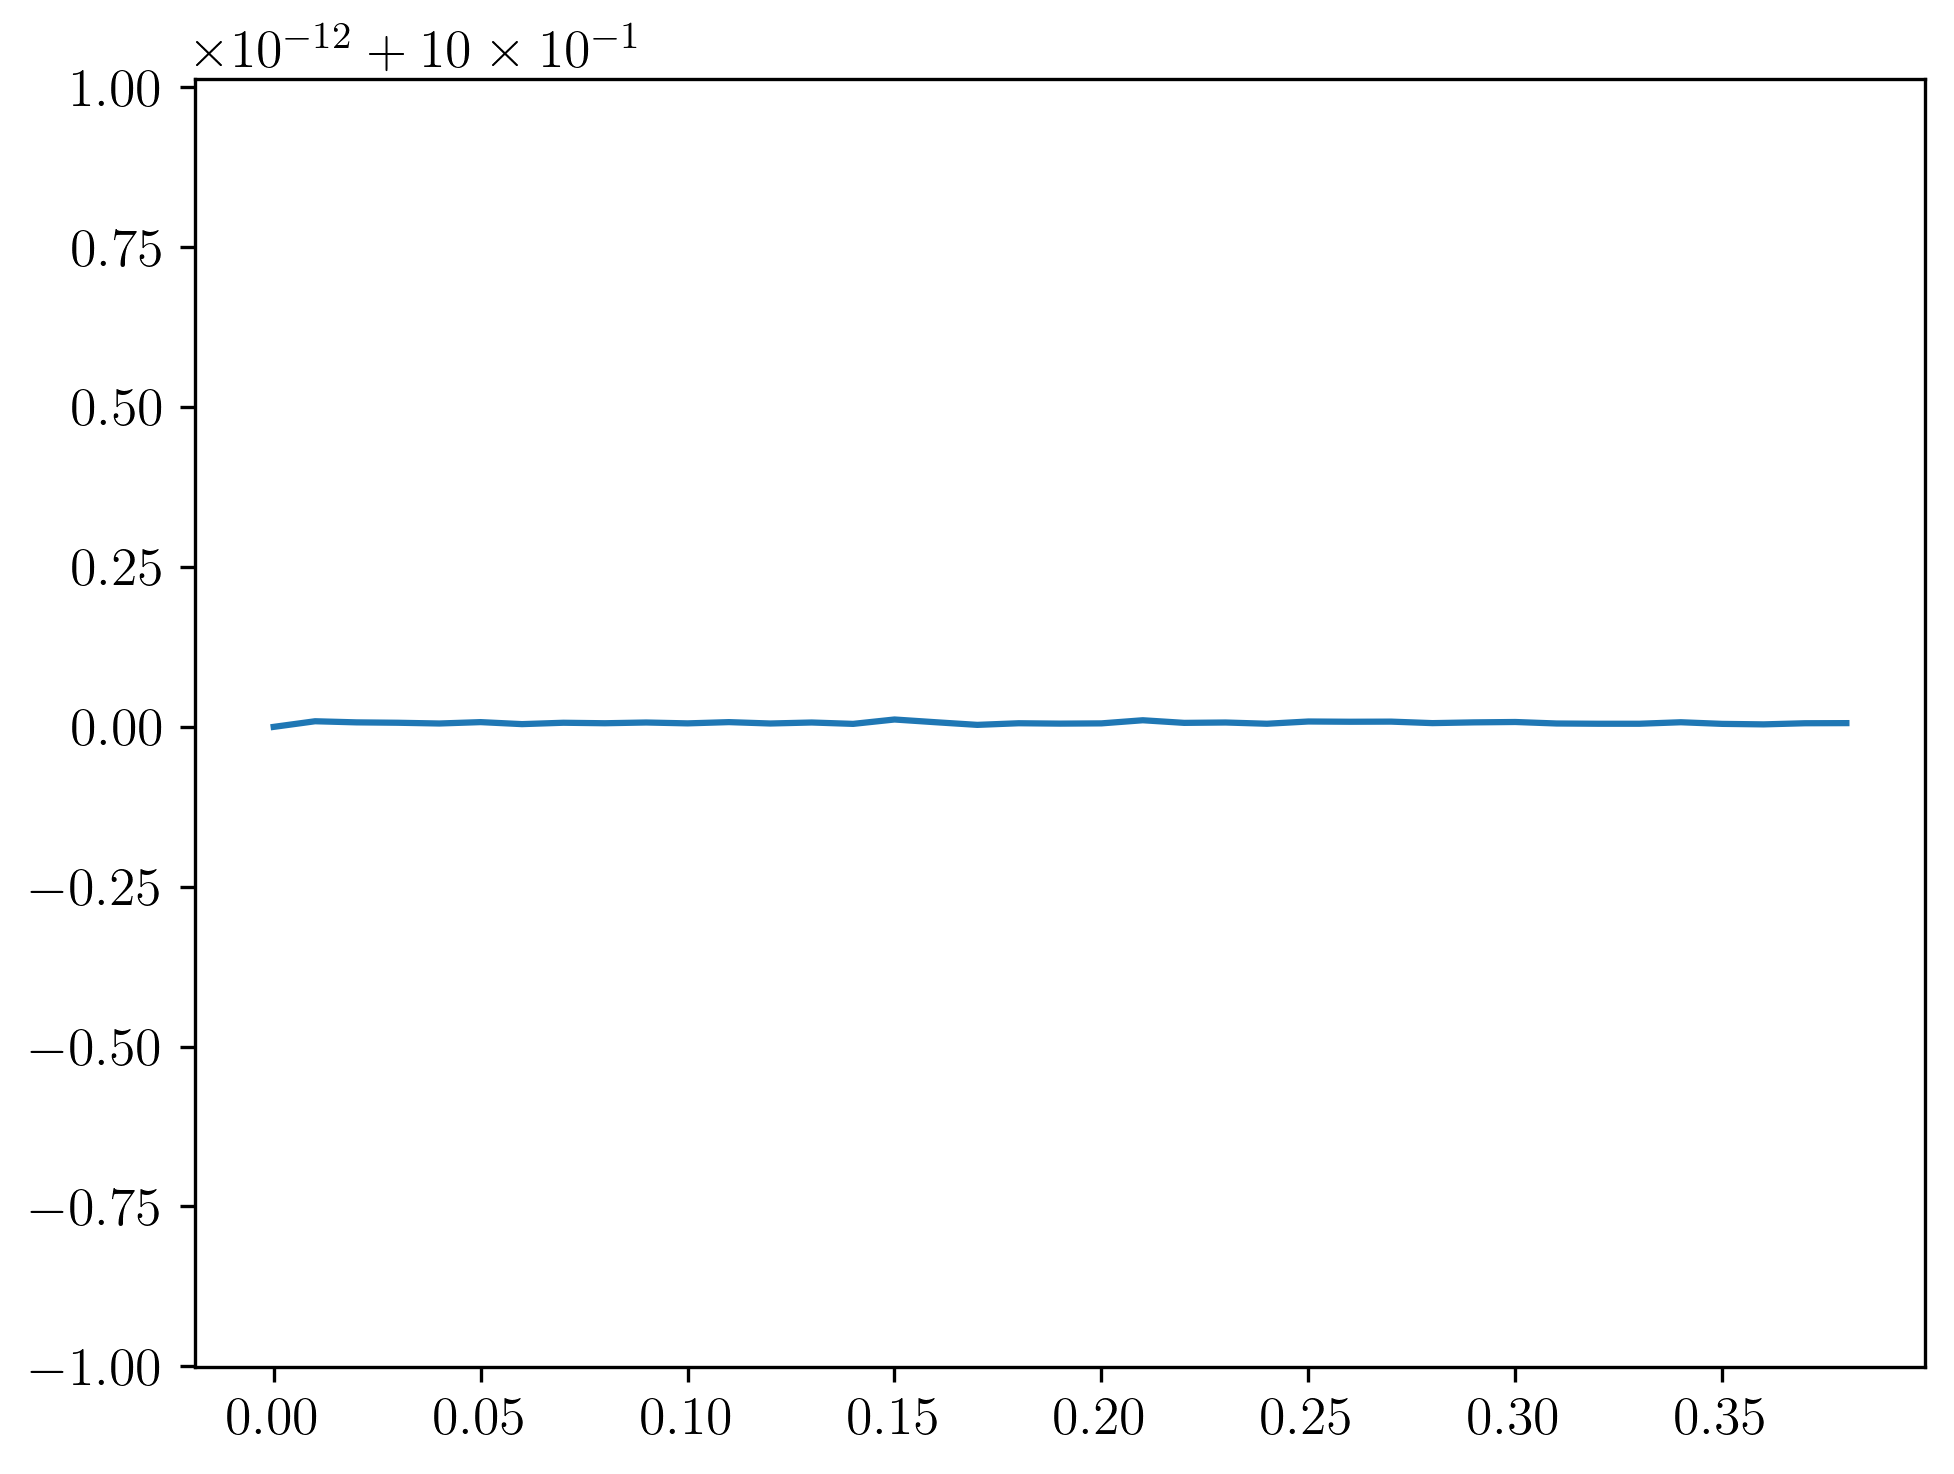

In [50]:
plt.plot(couplings[:-1], [np.abs(f) for f in fidelity])
# plt.ylim(1-1e-2,1+1e-3)
# plt.yscale('log')

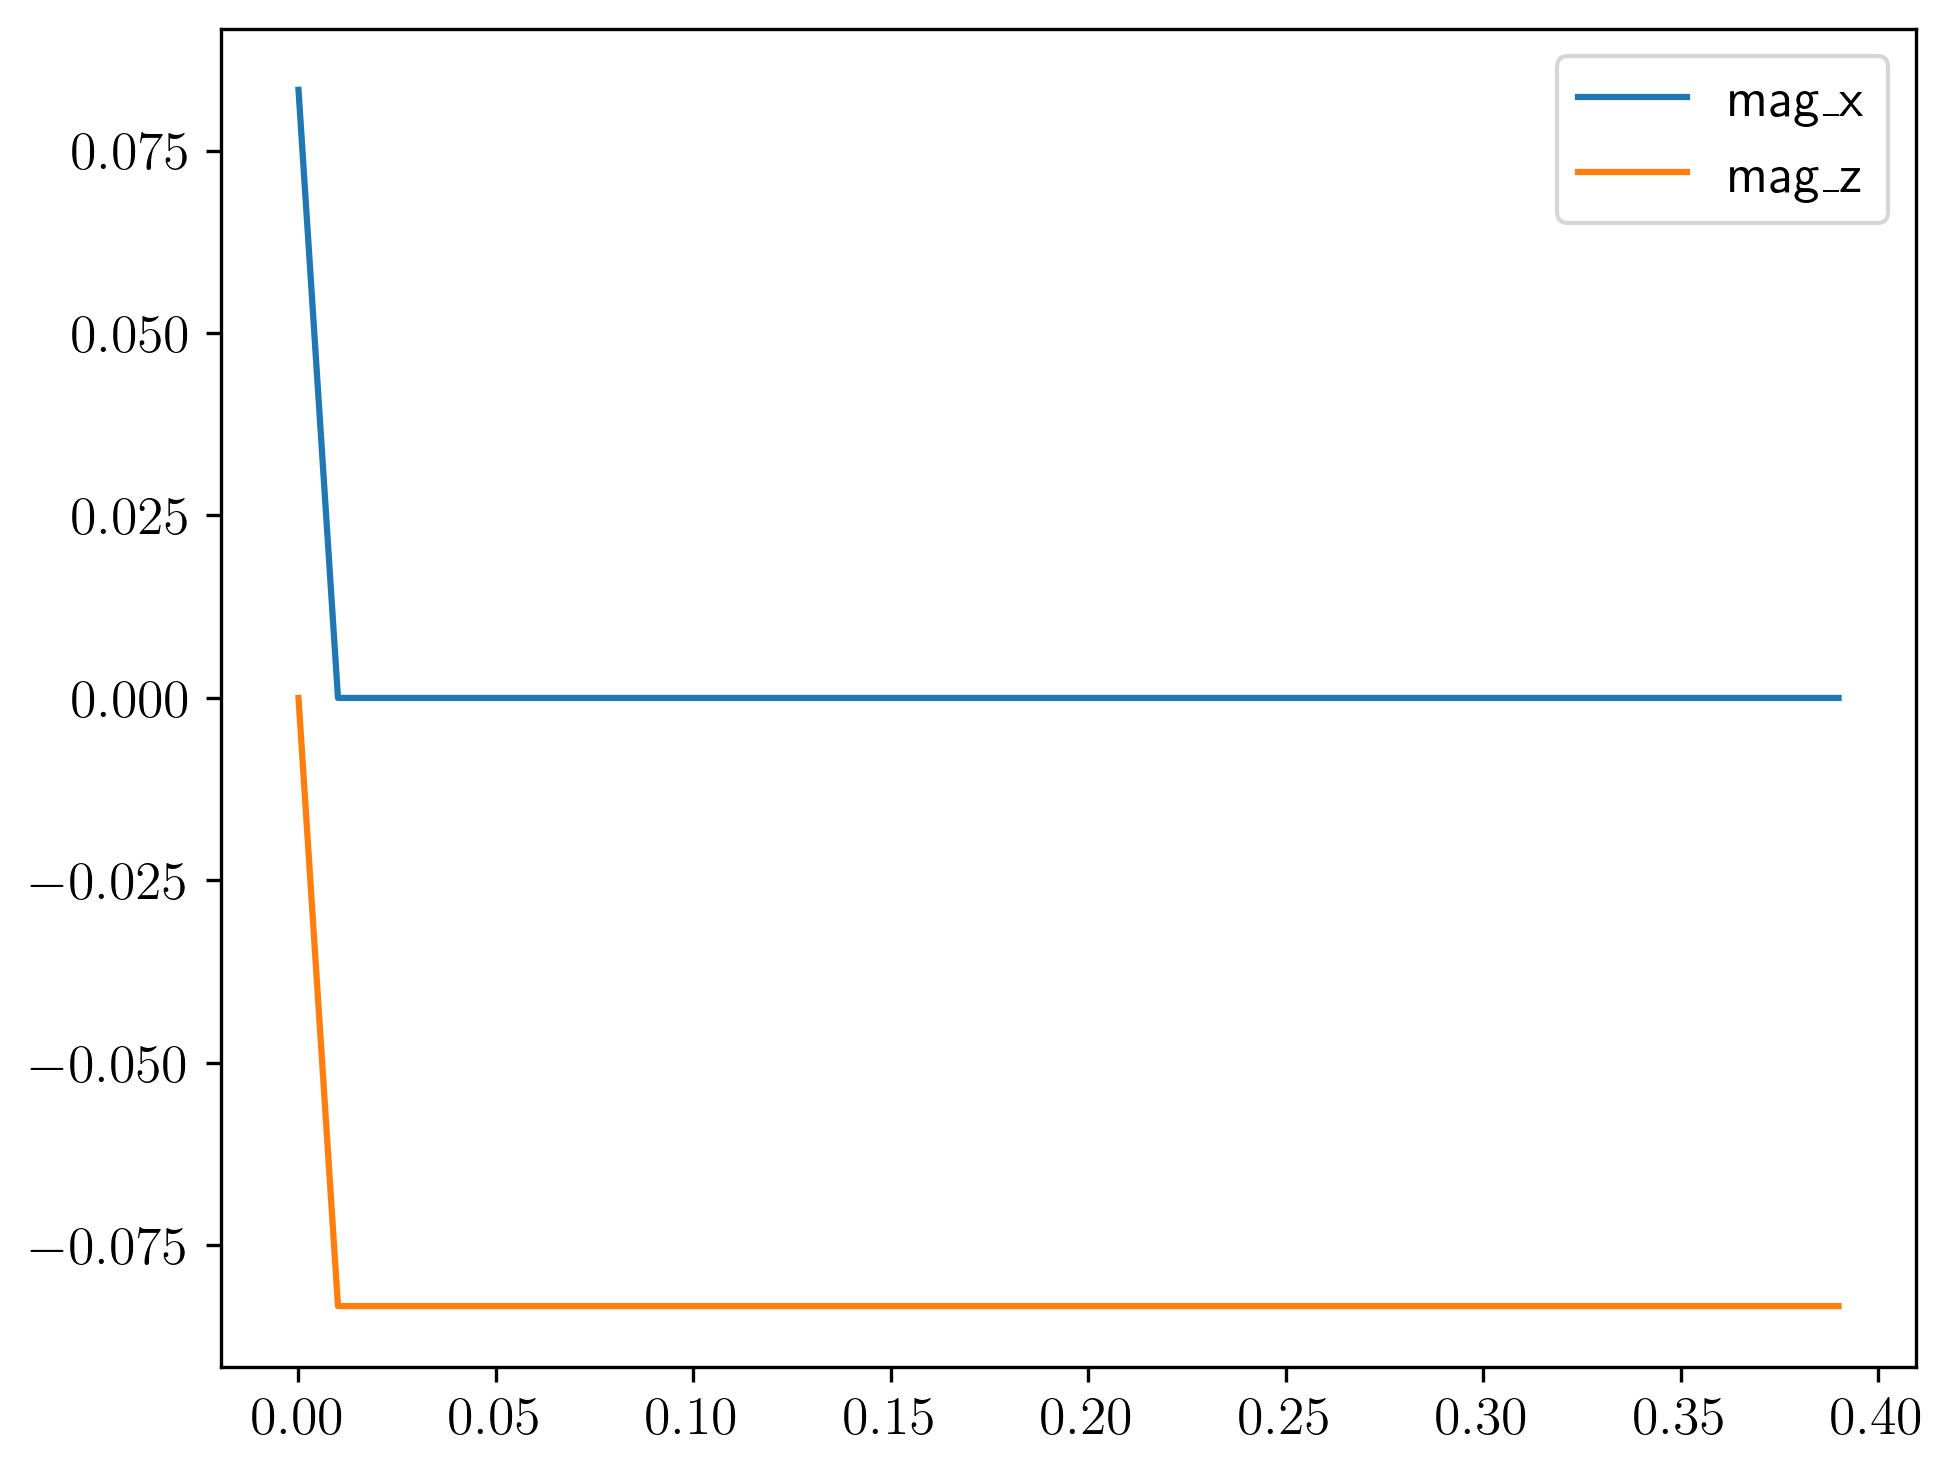

In [51]:
plt.plot(couplings, mag_x_tot, label='mag_x')
plt.plot(couplings, mag_z_tot, label='mag_z')
plt.legend()